In [1]:
pip install opendatasets


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/alxmamaev/flowers-recognition")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anirudh2211
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:01<00:00, 166MB/s]


In [3]:

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from random import shuffle  
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# specifically for cnn
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [4]:
classnames=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
X=[]
Z=[]
IMG_SIZE=150
daisy='/content/flowers-recognition/flowers/daisy'
sunflower='/content/flowers-recognition/flowers/sunflower'
tulip='/content/flowers-recognition/flowers/tulip'
dandelion='/content/flowers-recognition/flowers/dandelion'
rose='/content/flowers-recognition/flowers/rose'

In [6]:
def assign_label(img,classname):
    return classname

In [7]:
def data_train(classname,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,classname)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [8]:
import cv2                  
from tqdm import tqdm
import os  

In [9]:
data_train('Daisy',daisy)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 423.48it/s]

764


In [10]:
data_train('sunflower',sunflower)
print(len(X))

100%|██████████| 733/733 [00:02<00:00, 349.04it/s]

1497


In [11]:
data_train('tulip',tulip)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 399.89it/s]

2481


In [13]:
data_train('Dandelion',dandelion)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 408.99it/s]

3533


In [14]:
data_train('rose',rose)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 429.95it/s]

4317


In [15]:
def show_picture(class_names, images, labels):
   
    
    index = np.random.randint(len(labels))
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title('Image #{} : '.format(index) + labels[index])
    plt.show()

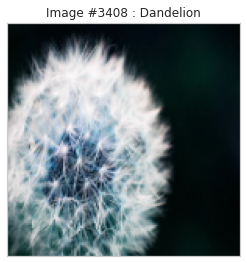

In [16]:
show_picture(classnames, X, Z)

In [17]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [21]:
x_train.shape

(3021, 150, 150, 3)

In [22]:
np.random.seed(42)

In [23]:
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [32]:
batch_size=256
epochs=60

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [33]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [34]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 512)      0

In [37]:





History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/60
11/11 [==============================] - 16s 1s/step - loss: 0.1644 - accuracy: 0.9410 - val_loss: 0.8196 - val_accuracy: 0.8009
Epoch 2/60
11/11 [==============================] - 16s 1s/step - loss: 0.1707 - accuracy: 0.9353 - val_loss: 0.8439 - val_accuracy: 0.7847
Epoch 3/60
11/11 [==============================] - 16s 1s/step - loss: 0.1770 - accuracy: 0.9342 - val_loss: 0.8095 - val_accuracy: 0.8009
Epoch 4/60
11/11 [==============================] - 16s 1s/step - loss: 0.1524 - accuracy: 0.9450 - val_loss: 0.7935 - val_accuracy: 0.8056
Epoch 5/60
11/11 [==============================] - 15s 1s/step - loss: 0.1136 - accuracy: 0.9613 - val_loss: 0.8285 - val_accuracy: 0.8094
Epoch 6/60
11/11 [==============================] - 16s 1s/step - loss: 0.1431 - accuracy: 0.9479 - val_loss: 0.8683 - val_accuracy: 0.8133
Epoch 7/60
11/11 [==============================] - 16s 1s/step - loss: 0.1434 - accuracy: 0.9501 - val_loss: 0.8685 - val_accuracy: 0.7932
Epoch 8/60
11/11 [==

In [38]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [39]:
test_digits = np.argmax(y_test,axis=1)

In [40]:
print("Accuracy : {}".format(accuracy_score(test_digits, pred_digits)*100))

Accuracy : 80.01543209876543


In [48]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [51]:
model.save('/content/drive/MyDrive/flowers/model/newmodel.h5')

In [54]:
from tensorflow import keras
newmodel = tf.keras.models.load_model('/content/drive/MyDrive/flowers/model/newmodel.h5')
newmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 512)       1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 512)      0

In [55]:
newmodel.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/60
12/12 [==============================] - 9s 759ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 1.0377 - val_accuracy: 0.8194
Epoch 2/60
12/12 [==============================] - 9s 721ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 1.0507 - val_accuracy: 0.8148
Epoch 3/60
12/12 [==============================] - 9s 721ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 1.1022 - val_accuracy: 0.8117
Epoch 4/60
12/12 [==============================] - 9s 723ms/step - loss: 0.0099 - accuracy: 0.9977 - val_loss: 1.0832 - val_accuracy: 0.8241
Epoch 5/60
12/12 [==============================] - 9s 725ms/step - loss: 0.0053 - accuracy: 0.9977 - val_loss: 1.0860 - val_accuracy: 0.8210
Epoch 6/60
12/12 [==============================] - 9s 722ms/step - loss: 0.0053 - accuracy: 0.9980 - val_loss: 1.1129 - val_accuracy: 0.8156
Epoch 7/60
12/12 [==============================] - 9s 720ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 1.1053 - val_accuracy: 0.8171
Epoch 

In [67]:
model.save('/content/drive/MyDrive/flowers/model/newmodel1.h5')


In [69]:
from tensorflow import keras
newmodel = tf.keras.models.load_model('/content/drive/MyDrive/flowers/model/newmodel.h5')

In [78]:
acc = newmodel.evaluate(x_train,  y_train, verbose=2)
# print(type(acc))
#print('accuracy',acc)
print('accuracy - {}'.format(acc[-1]*100))

95/95 - 3s - loss: 0.0353 - accuracy: 0.9884 - 3s/epoch - 29ms/step
accuracy - 98.84144067764282


References:
https://www.kaggle.com/code/almahmudalmamun/flower-recognition 

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator 

https://www.tensorflow.org/tutorials/images/cnn 

https://keras.io/api/models/model_training_apis/ 

https://learnopencv.com/read-display-and-write-an-image-using-opencv/ 